<a href="https://colab.research.google.com/github/shodimaggio/VieWork/blob/master/vie_sec5_gradfilt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 勾配フィルタ


## 画像ファイルの準備
以下では、画像ファイルを手元からアップロードする方法とURLを指定してアクセスする方法のいずれかを利用してください。
### アップロードする方法

In [0]:
#from google.colab import files
#uploaded_file = files.upload()

In [0]:
#file_name = next(iter(uploaded_file))
#print(file_name)

### URLを指定してアクセスする方法
- 参照サイト：　http://homepages.cae.wisc.edu/~ece533/images/

In [0]:
import urllib.request
import io

url = 'http://homepages.cae.wisc.edu/~ece533/images/lena.png'
file_name = io.BytesIO(urllib.request.urlopen(url).read())

## 画像の読み込み
画像処理ライブラリ Scikit-image (skimage) を利用

In [42]:
from skimage import io
img = io.imread(file_name)
img.dtype

dtype('uint8')

## 画像の表示
可視化ライブラリMatplotlibを利用

(-0.5, 511.5, 511.5, -0.5)

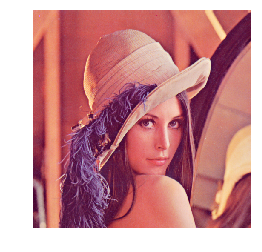

In [43]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.axis('off')

## グレースケール画像に変換
符号なし整数8ビット(uint8)型を最大値1にスケーリングして浮動小数点数型(float)に変更

In [44]:
from skimage.color import rgb2gray

gray_img = rgb2gray(img)
display(gray_img.dtype)
gray_img.max()

dtype('float64')

0.9654356862745097

## グレースケール画像の表示



(-0.5, 511.5, 511.5, -0.5)

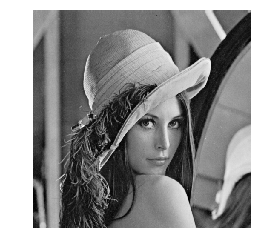

In [45]:
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

## フィルターカーネル（マスク係数）の準備
垂直方向

In [46]:
import numpy as np

filter_kernel_v = np.array([ [-1,-1,-1],[0,0,0],[1,1,1] ])
display(filter_kernel_v)

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

水平方向

In [47]:
filter_kernel_h = filter_kernel_v.transpose()
display(filter_kernel_h)

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

## フィルタ処理
Scipyライブラリの ndimage.correlate メソッドを利用（零値拡張処理）

In [0]:
from scipy.ndimage import correlate

res_img_v = correlate(gray_img, filter_kernel_v, mode='constant', cval=0.0)
res_img_h = correlate(gray_img, filter_kernel_h, mode='constant', cval=0.0)

## 処理結果の表示
垂直方向差分

(-0.5, 511.5, 511.5, -0.5)

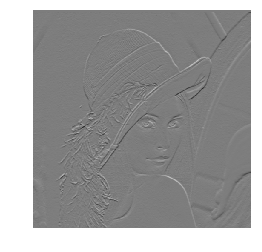

In [49]:
plt.imshow(res_img_v,cmap='gray')
plt.axis('off')

水平方向差分

(-0.5, 511.5, 511.5, -0.5)

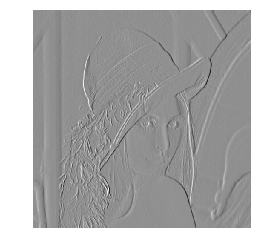

In [50]:
plt.imshow(res_img_h,cmap='gray')
plt.axis('off')

# 勾配の大きさと方向の表示
勾配の大きさを強度(V)，勾配の方向を色相(H)としてHSV色空間にマッピングし、
RGB色空間に変換してカラー画像として表示

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

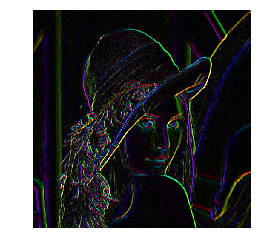

In [51]:
from skimage.color import hsv2rgb

img_grad_mag = np.sqrt(res_img_h**2+res_img_v**2)
img_grad_dir = np.arctan2(res_img_h,res_img_v)/(2*np.pi)+0.5
img_grad_hsv = np.dstack((img_grad_dir,np.ones(gray_img.shape),img_grad_mag))

img_grad_rgb = hsv2rgb(img_grad_hsv)
plt.imshow(img_grad_rgb)
plt.axis('off')